In [1]:
# ECG Heartbeat Categorization

import kagglehub

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

Path to dataset files: /Volumes/HP_P900/Users/tungnguyen/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


In [2]:
import os 
os.listdir(path)

['mitbih_test.csv',
 'ptbdb_abnormal.csv',
 'ptbdb_normal.csv',
 'mitbih_train.csv']

In [3]:
import pandas as pd

train_df = pd.read_csv(os.path.join(path, 'mitbih_train.csv'), header=None)
test_df = pd.read_csv(os.path.join(path, 'mitbih_test.csv'), header=None)

In [4]:
train_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(train_df.shape)
y_train = train_df[187]
print(y_train.shape)
X_train = train_df.iloc[:, :187]
print(X_train.shape)

print(test_df.shape)
y_test = test_df[187]
print(y_test.shape)
X_test = test_df.iloc[:, :187]
print(X_test.shape)


(87554, 188)
(87554,)
(87554, 187)
(21892, 188)
(21892,)
(21892, 187)


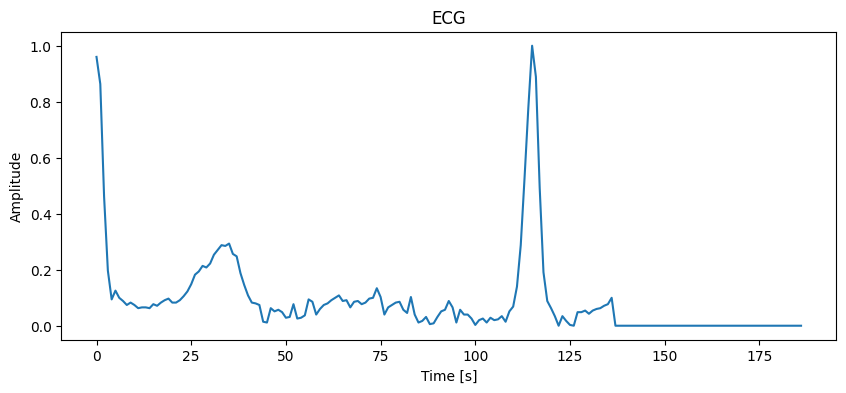

In [6]:
from matplotlib import pyplot as plt

def plot_ecg(ecg, title="ECG"):
    plt.figure(figsize=(10, 4))
    plt.plot(ecg)
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

plot_ecg(X_train.iloc[1])

In [7]:
y_train.value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

<Axes: xlabel='187', ylabel='count'>

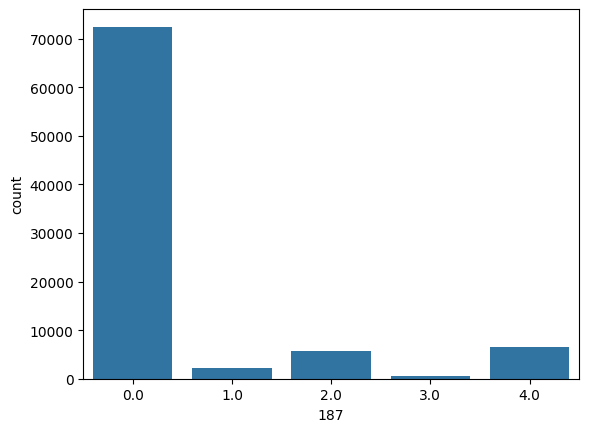

In [8]:
import seaborn as sns

sns.barplot(y_train.value_counts())   

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

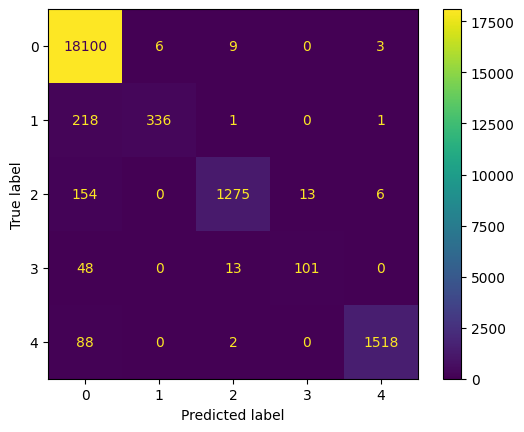

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [11]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))

0.9743285218344601


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.98      0.60      0.75       556
         2.0       0.98      0.88      0.93      1448
         3.0       0.89      0.62      0.73       162
         4.0       0.99      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.81      0.87     21892
weighted avg       0.97      0.97      0.97     21892



In [13]:
# Simple CNN Model for ECG Classification

import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Prepare data for CNN (reshape to 1D convolution format)
X_train_cnn = X_train.values.reshape(-1, 187, 1)
X_test_cnn = X_test.values.reshape(-1, 187, 1)

# Convert labels to one-hot encoding
y_train_cnn = to_categorical(y_train, num_classes=5)
y_test_cnn = to_categorical(y_test, num_classes=5)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(187, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


/Volumes/HP_P900/Users/tungnguyen/miniforge3/envs/pip12/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
/Volumes/HP_P900/Users/tungnguyen/miniforge3/envs/pip12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-20 08:02:25.346203: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2026-01-20 08:02:25.346239: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-01-20 08:02:25.346242: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2026-01-20 08:02:25.346271: I tensorflow/core/common_runtime/plug

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 183, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2752)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       352,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,525 (1.39 MB)

 Trainable params: 363,525 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Train the CNN model
history = model.fit(
    X_train_cnn, y_train_cnn,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10


2026-01-20 08:02:26.114099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2189/2189 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.1387 - val_loss: 40.9173
Epoch 2/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 1.0000 - loss: 2.9614e-10 - val_accuracy: 0.1387 - val_loss: 40.9238
Epoch 3/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 1.0000 - loss: 3.7953e-10 - val_accuracy: 0.1387 - val_loss: 40.9476
Epoch 4/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 1.0000 - loss: 2.7231e-10 - val_accuracy: 0.1387 - val_loss: 41.0140
Epoch 5/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 1.0000 - loss: 1.8211e-10 - val_accuracy: 0.1387 - val_loss: 41.1191
Epoch 6/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 1.0000 - loss: 2.1104e-10 - val_accuracy: 0.1387 - val_loss: 41.4971
Epoch 7/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 1.0000 - loss: 1.3956e-10 - val_accuracy: 0.1387 - val_loss: 42.2030
Epoch 8/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step 

685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8276 - loss: 8.9844

Test Accuracy: 0.8276
Test Loss: 8.9844
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


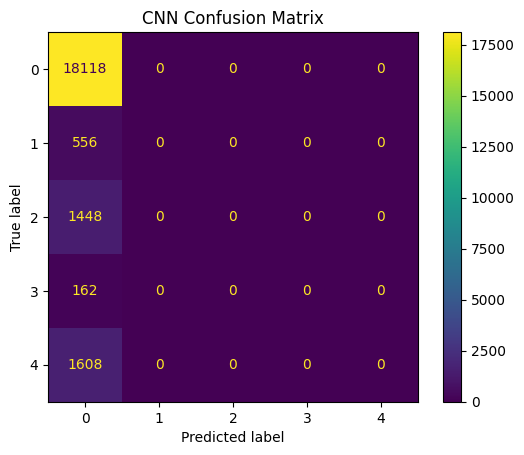

In [15]:
# Evaluate CNN on test set
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test_cnn)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Get predictions
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

# Show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_cnn = confusion_matrix(y_test, y_pred_cnn_labels)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp_cnn.plot()
plt.title("CNN Confusion Matrix")
plt.show()
